In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from time import time

from os.path import join as p_join

import seaborn as sns

from tqdm import tqdm


##################################
## GLOBAL SETTINGS ###############
##################################
plt.rcParams["figure.figsize"] = (12,8)

def seed_all(seed=42):

    random.seed(seed)
    np.random.seed(seed)
    print("[ Using Seed : ", seed, " ]")

####################################
#####   SEED ALL EXPERIMENTS   #####
####################################
seed_all()

[ Using Seed :  42  ]


In [2]:
import sys
sys.path.append("../../../") # Adds higher directory to python modules path.
from utils import utils

### Define constants

In [3]:
from sklearn import svm

#################################
####### GLOBAL CONFIG ###########
#################################
CONFIG = {'scoring': ['accuracy', 'f1_macro'],
          'cv': 5,
          'n_jobs': -1}

data_path = p_join('..', '..', '..', 'data_2')
params = {'kernel': ['poly', 'rbf'], 'C': [10, 15, 20]}

### Run calculation

In [4]:
all_results = {}

for l in ['L=1.6', 'L=6.6', 'L=7.6', 'L=8.6', 'L=10.6']:
    FOLDERS = [p_join(os.path.abspath(data_path), item) for item in os.listdir(data_path) if l in item]
    X, Y = utils.create_dataset(FOLDERS)
    X = utils.normalize_data(X)
    svc_grid_search_res = utils.greed_searc_cv(svm.SVC(),
                                               params,
                                               CONFIG,
                                               X, Y)
    all_results[l] = svc_grid_search_res

100%|███████████████████████████████████████████| 16/16 [00:01<00:00, 15.08it/s]


### Create data frame

In [5]:
data = {}
for method in all_results:
    res = all_results[method]
    bi = res['best_index']
    val = []
    for kk in res['cv_results']:
        if 'mean_test' in kk:
            val.append(res['cv_results'][kk][bi])
    data[method] = val

df = pd.DataFrame.from_dict(data, orient='index', columns=CONFIG['scoring'])

In [8]:
df

,accuracy,f1_macro
L=1.6,0.502266,0.500691
L=6.6,0.631971,0.631199
L=7.6,0.682827,0.682441
L=8.6,0.689157,0.689127
L=10.6,0.742295,0.742175


In [7]:
for k in all_results:
    print(k)
    print(all_results[k])
    print('*'*20)

L=1.6
{"best_['accuracy', 'f1_macro']_score": 0.5022662709392145, 'best_params': {'C': 15, 'kernel': 'poly'}, 'cv_results': {'mean_fit_time': array([190.2484623 , 224.21719365, 208.2312418 , 233.41671228,
       202.8981462 , 204.46221662]), 'std_fit_time': array([0.90210425, 8.04169566, 2.55658618, 2.08443955, 9.05213894,
       7.21570509]), 'mean_score_time': array([43.32176185, 80.95565662, 41.66839585, 80.59318171, 39.37025561,
       52.77826791]), 'std_score_time': array([0.54831327, 2.09142776, 1.59481126, 4.65168299, 6.89937224,
       2.78123092]), 'param_C': masked_array(data=[10, 10, 15, 15, 20, 20],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['poly', 'rbf', 'poly', 'rbf', 'poly', 'rbf'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 10, 'kernel': 'poly'}, {'C': 10, 'kernel': 'rbf'}, {'C': 1

In [9]:
params = {'kernel': ['rbf'], 'C': [20, 25, 30]}

all_results = {}

for l in ['L=1.6', 'L=6.6', 'L=7.6', 'L=8.6', 'L=10.6']:
    FOLDERS = [p_join(os.path.abspath(data_path), item) for item in os.listdir(data_path) if l in item]
    X, Y = utils.create_dataset(FOLDERS)
    X = utils.normalize_data(X)
    svc_grid_search_res = utils.greed_searc_cv(svm.SVC(),
                                               params,
                                               CONFIG,
                                               X, Y)
    all_results[l] = svc_grid_search_res

100%|███████████████████████████████████████████| 16/16 [00:01<00:00, 15.63it/s]


In [10]:
data = {}
for method in all_results:
    res = all_results[method]
    bi = res['best_index']
    val = []
    for kk in res['cv_results']:
        if 'mean_test' in kk:
            val.append(res['cv_results'][kk][bi])
    data[method] = val

df = pd.DataFrame.from_dict(data, orient='index', columns=CONFIG['scoring'])

In [11]:
df

,accuracy,f1_macro
L=1.6,0.503876,0.502057
L=6.6,0.642926,0.642131
L=7.6,0.688828,0.688395
L=8.6,0.697471,0.697412
L=10.6,0.753563,0.753481


In [12]:
for k in all_results:
    print(k)
    print(all_results[k])
    print('*'*20)

L=1.6
{"best_['accuracy', 'f1_macro']_score": 0.5038759780341804, 'best_params': {'C': 25, 'kernel': 'rbf'}, 'cv_results': {'mean_fit_time': array([213.49332204, 212.15392337, 212.69138579]), 'std_fit_time': array([1.4642568 , 1.27603207, 4.12238613]), 'mean_score_time': array([89.78622203, 83.59219508, 75.14188204]), 'std_score_time': array([3.2273584 , 5.77484982, 1.53804119]), 'param_C': masked_array(data=[20, 25, 30],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 20, 'kernel': 'rbf'}, {'C': 25, 'kernel': 'rbf'}, {'C': 30, 'kernel': 'rbf'}], 'split0_test_accuracy': array([0.50488396, 0.50472767, 0.50394624]), 'split1_test_accuracy': array([0.50629054, 0.50691568, 0.50722826]), 'split2_test_accuracy': array([0.50347738, 0.50386809, 0.50488396]), 'split3_test_accuracy': array([0

In [16]:
params = {'kernel': ['rbf'], 'C': [100, 200, 1000]}

all_results = {}

for l in ['L=1.6', 'L=6.6', 'L=7.6', 'L=8.6', 'L=10.6']:
    FOLDERS = [p_join(os.path.abspath(data_path), item) for item in os.listdir(data_path) if l in item]
    X, Y = utils.create_dataset(FOLDERS)
    X = utils.normalize_data(X)
    svc_grid_search_res = utils.greed_searc_cv(svm.SVC(),
                                               params,
                                               CONFIG,
                                               X, Y)
    all_results[l] = svc_grid_search_res

100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 23.71it/s]


In [17]:
data = {}
for method in all_results:
    res = all_results[method]
    bi = res['best_index']
    val = []
    for kk in res['cv_results']:
        if 'mean_test' in kk:
            val.append(res['cv_results'][kk][bi])
    data[method] = val

df = pd.DataFrame.from_dict(data, orient='index', columns=CONFIG['scoring'])

In [18]:
df

,accuracy,f1_macro
L=1.6,0.503798,0.502040
L=6.6,0.687281,0.686501
L=7.6,0.723040,0.722706
L=8.6,0.744936,0.744812
L=10.6,0.799059,0.799036


In [19]:
for k in all_results:
    print(k)
    print(all_results[k])
    print('*'*20)

L=1.6
{"best_['accuracy', 'f1_macro']_score": 0.5037978518185346, 'best_params': {'C': 100, 'kernel': 'rbf'}, 'cv_results': {'mean_fit_time': array([225.41567855, 238.35041776, 330.27913733]), 'std_fit_time': array([1.51151756, 2.69845678, 5.33725688]), 'mean_score_time': array([93.73798723, 84.16971865, 55.05201864]), 'std_score_time': array([1.03496175, 9.45647381, 5.1117294 ]), 'param_C': masked_array(data=[100, 200, 1000],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 100, 'kernel': 'rbf'}, {'C': 200, 'kernel': 'rbf'}, {'C': 1000, 'kernel': 'rbf'}], 'split0_test_accuracy': array([0.50808783, 0.50933813, 0.51097914]), 'split1_test_accuracy': array([0.50386809, 0.50199265, 0.50355552]), 'split2_test_accuracy': array([0.49691334, 0.49824178, 0.4973822 ]), 'split3_test_accuracy':

### Grid search on small dataset

In [26]:
import matplotlib
plt.rcParams["figure.figsize"] = (12,8)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [27]:
C = np.linspace(1, 1600, 100)
count_data = 5000
l = '10.6'

FOLDERS = [p_join(os.path.abspath(data_path), item) for item in os.listdir(data_path) if l in item]
X, Y = utils.create_dataset(FOLDERS)
X = utils.normalize_data(X)

X = X[500:count_data]
Y = Y[500:count_data]
results = []

for c in tqdm(C):
    model = svm.SVC(C=c, kernel='rbf')
    res = utils.calc_ml_method(model, CONFIG, X, Y)
    res = res[str(CONFIG['scoring'])]
    results.append(res['test_accuracy'].mean())

100%|█████████████████████████████████████████| 100/100 [09:30<00:00,  5.71s/it]


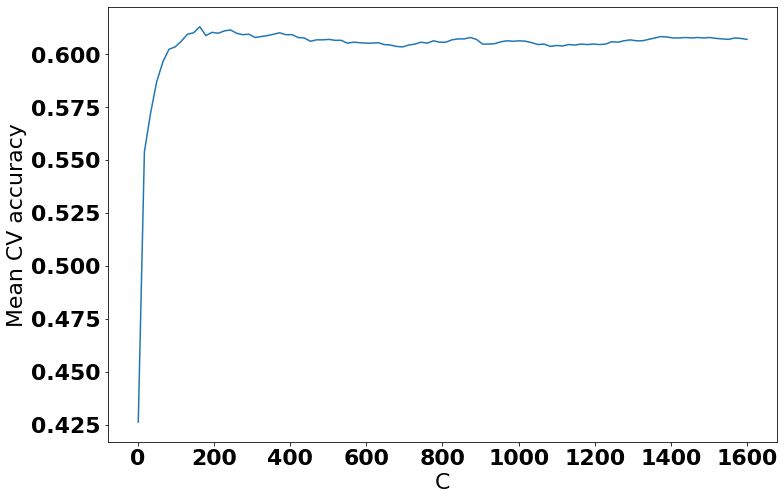

In [28]:
plt.plot(C, results)
plt.xlabel('C')
plt.ylabel('Mean CV accuracy')
pass

In [29]:
C[np.argmax(results)]

162.51515151515153